In [ ]:
'''Project utility functions and variables'''

In [ ]:
# import numpy as np
# import astropy.units as u
# import astropy.coordinates as coord

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def plot_cov_ellipse(
    cov, xaxis=0, yaxis=1, ax=None, n_std=3.0, center=(0, 0), facecolor="none", **kwargs
):
    """
    Plot 2D covariance matrix as ellipse

    Parameters
    ----------
    cov : array, (2,2)
        covariance matrix
        
    xaxis, yaxis : int
        axis to plot
        
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse size.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    
    # select 2-dim section of cov
    sel = np.meshgrid([xaxis, yaxis], [xaxis, yaxis], indexing="ij")
    cov = cov[sel[0], sel[1]]
    
    if ax is None:
        ax=plt.gca()

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse(
        (0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs
    )

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = center[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = center[1]

    transf = (
        transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

[[1.32420229 0.86248557 0.95558147 1.17670708 0.74264413]
 [0.86248557 1.29115632 0.58657055 0.97948977 0.39763967]
 [0.95558147 0.58657055 0.88669269 1.01254197 0.72684109]
 [1.17670708 0.97948977 1.01254197 1.66584398 0.71705296]
 [0.74264413 0.39763967 0.72684109 0.71705296 1.06826132]]


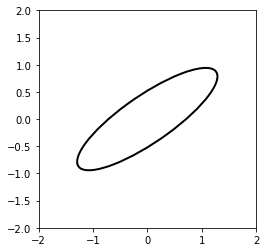

In [96]:
# from scipy import random
# A = random.rand(5,5)
# B = np.dot(A,A.transpose())
# print(B)
# fig, ax = plt.subplots()
# plot_cov_ellipse(B, xaxis=3,yaxis=2, ax=ax, lw=2, n_std=1, edgecolor='k',)
# ax.set(xlim=(-2,2),ylim=(-2,2),aspect=1);

In [ ]:
def plot_T_icrs(fit, fig=None):
    """Plot 3x3 grid of each component of T = dv/dx
    
    fit : StanFit
        fit object
    """
    if fig:
        ax = fig.axes
    else:
        fig, ax = plt.subplots(3, 3, figsize=(6, 5), sharex=True, sharey=True)
        fig.subplots_adjust(
            bottom=0.15, top=0.92, right=0.95, left=0.1, hspace=0.05, wspace=0.05
        )
        ax = ax.ravel()
    for cax, cT in zip(ax, fit["T_param"].reshape((-1, 9)).T):
        #     cax.hist(cT, bins=32, density=True, histtype="step")
        sns.distplot(cT, hist=False, ax=cax, kde_kws={'lw':1})
        cax.axvline(0, c="gray", lw=0.5)
    fig.text(0.55, 0.05, "m/s/pc", ha="center", va="center", size=20)
    fig.text(0.05, 0.55, "Density", ha="center", va="center", rotation=90, size=20)
    for cax in ax:
        cax.yaxis.set_major_formatter(ticker.NullFormatter())
    for cax in ax:
        cax.set_xticks([-50, 0, 50])
    fig.suptitle("$T$ (ICRS)", size=20)
    return fig

In [ ]:
def plot_omegas(fit):
    """Plot rotational component of T
    """
    wT = decompose_T(fit["T_param"])
    fig, ax = plt.subplots(figsize=(4,4))
    sns.distplot(wT["omegax"], hist=False, kde_kws={'lw':1}, label=r'$\omega_x$')
    sns.distplot(wT["omegay"], hist=False, kde_kws={'lw':1}, label=r'$\omega_y$')
    sns.distplot(wT["omegaz"], hist=False, kde_kws={'lw':1}, label=r'$\omega_z$')
    omega = np.sqrt(wT["omegax"] ** 2 + wT["omegay"] ** 2 + wT["omegaz"] ** 2)
    print(f"omega = {np.mean(omega)} +- {np.std(omega)}")
    sns.distplot(omega, hist=False, color='k', label=r'$\omega$')
    ax.axvline(0, c='k', lw=1)
    ax.legend(fontsize=14)
    ax.set_xlabel(r'$\rm m\,\rm s^{-1}\,\rm pc^{-1}$');
    return fig

In [ ]:
def plot_omegas_galactic(fit):
    """Plot rotational component of T
    """
    wT = decompose_T(rotate_T_to_galactic(fit["T_param"]))
    fig, ax = plt.subplots(figsize=(4,4))
    sns.distplot(wT["omegax"], hist=False, kde_kws={'lw':1}, label=r'$\omega_x$')
    sns.distplot(wT["omegay"], hist=False, kde_kws={'lw':1}, label=r'$\omega_y$')
    sns.distplot(wT["omegaz"], hist=False, kde_kws={'lw':1}, label=r'$\omega_z$')
    omega = np.sqrt(wT["omegax"] ** 2 + wT["omegay"] ** 2 + wT["omegaz"] ** 2)
    print(f"omega = {np.mean(omega)} +- {np.std(omega)}")
    sns.distplot(omega, hist=False, color='k', label=r'$\omega$')
    ax.axvline(0, c='k', lw=1)
    ax.legend(fontsize=14)
    ax.set_xlabel(r'$\rm m\,\rm s^{-1}\,\rm pc^{-1}$');
    return fig

In [ ]:
def plot_T_galactic(fit, fig=None, color=None):
    """Plot 3x3 grid of each component of T = dv/dx
    
    fit : StanFit
        fit object
    """
    if fig:
        ax = fig.axes
    else:
        fig, ax = plt.subplots(3, 3, figsize=(6, 5), sharex=True, sharey=True)
        fig.subplots_adjust(
            bottom=0.15, top=0.92, right=0.95, left=0.1, hspace=0.05, wspace=0.05
        )
        ax = ax.ravel()
    for cax, cT in zip(ax, rotate_T_to_galactic(fit["T_param"]).reshape((-1, 9)).T):
        #     cax.hist(cT, bins=32, density=True, histtype="step")
        sns.distplot(cT, hist=False, ax=cax, kde_kws={'lw':1}, color=color)
        cax.axvline(0, c="gray", lw=0.5)
    fig.text(0.55, 0.05, "m/s/pc", ha="center", va="center", size=20)
    fig.text(0.05, 0.55, "Density", ha="center", va="center", rotation=90, size=20)
    for cax in ax:
        cax.yaxis.set_major_formatter(ticker.NullFormatter())
    for cax in ax:
        cax.set_xticks([-50, 0, 50])
    fig.suptitle("$T$ (galactic)", size=20)
    return fig

In [ ]:
def add_transformed_posterior(azfit):
    '''Add transformed posterior samples for convenience
    
    Added parameters:
        - Sigma: velocity dispersion matrix, (3,3)
        - omegax, omegay, omegaz, w1, w1, w2, w3, w5, kappa: decomposed linear velocity field parameters
        - *_gal: quantities rotated to the Galactic frame
    '''
    v = azfit

    for ck, cv in kn.decompose_T(v.posterior['T_param']).items():
        v.posterior[ck]=cv
    # Combine scale and correlation matrix of Sigma to variance matrix
    sigv_samples, Omega_samples = v.posterior['sigv'],  v.posterior['Omega']
    Sigma_samples = np.einsum('cni,cnij,cnj->cnij', sigv_samples, Omega_samples, sigv_samples)
    v.posterior['Sigma'] = ('chain','draw','Sigma_dim_0','Sigma_dim_1'), Sigma_samples
    v.posterior['Sigma_gal'] = ('chain','draw','Sigma_dim_0','Sigma_dim_1'), kn.rotate_T_to_galactic(Sigma_samples)
    # Add rotated T matrix and decomposition
    v.posterior['T_param_gal'] = ('chain','draw','dim0','dim1'), kn.rotate_T_to_galactic(v.posterior['T_param'])
    for ck, cv in kn.decompose_T(v.posterior['T_param_gal']).items():
        v.posterior[ck+'_gal']  = cv
    return v